# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
sm_df = pd.read_excel("/content/drive/MyDrive/Datasets/Superstore Marketing Data.xlsx")

In [7]:
sm_df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0


In [8]:
sm_df.shape

(2240, 22)

In [9]:
sm_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [10]:
##Calculationg total products buy of each custmers
sm_df['Total_buy'] = sm_df['MntFishProducts'] + sm_df['MntSweetProducts'] + sm_df['MntGoldProds'] + sm_df['MntMeatProducts'] +sm_df['MntWines'] +sm_df['MntFruits']

#creating column called age, by substracting year of birth from current year
sm_df["Age"] = pd.Timestamp.today().year - sm_df["Year_Birth"]

In [11]:
## Treating income null values on thier buying quantitiy

mean_total_buy = sm_df['Total_buy'].mean()

# Filter the DataFrame where 'Total_buy' is greater than the mean
filtered_df = sm_df[sm_df['Total_buy'] > mean_total_buy]

# Calculate the mean income for the filtered DataFrame
mode_income_filtered = filtered_df['Income'].mode().iloc[0]

# Fill null values in 'Income' column with the calculated mean income
sm_df.loc[sm_df['Total_buy'] > mean_total_buy, 'Income'] = sm_df.loc[sm_df['Total_buy'] > mean_total_buy, 'Income'].fillna(mode_income_filtered)



In [12]:
filtered_df1 = sm_df[sm_df['Total_buy'] <= mean_total_buy]

# Calculate the mean income for the filtered DataFrame
mean_income_filtered = filtered_df1['Income'].mode().iloc[0]
sm_df.loc[sm_df['Total_buy'] <= mean_total_buy, 'Income'] = sm_df.loc[sm_df['Total_buy'] <= mean_total_buy, 'Income'].fillna(mode_income_filtered)

In [13]:
sm_df['Total_buy'].sum()

1356988

In [14]:
##Dropping the dt_customer because it has almost null values
sm_df.drop(columns=['Dt_Customer'],inplace = True)

In [15]:
sm_df.isna().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0


In [16]:
sm_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Total_buy', 'Age'],
      dtype='object')

In [17]:
#table of description showing mean, standard deviation, count, quantiles and max
sm_df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_buy,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52371.470089,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,605.798214,55.194196
std,3246.662198,11.984069,25066.245309,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,602.249288,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,28.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,68.750000,47.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,396.000000,54.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1045.500000,65.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2525.000000,131.000000


In [18]:
## Descriptive stats of Age
bold = '\033[1m'
age_stats = sm_df['Age'].describe()
print(bold,age_stats)

 count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64


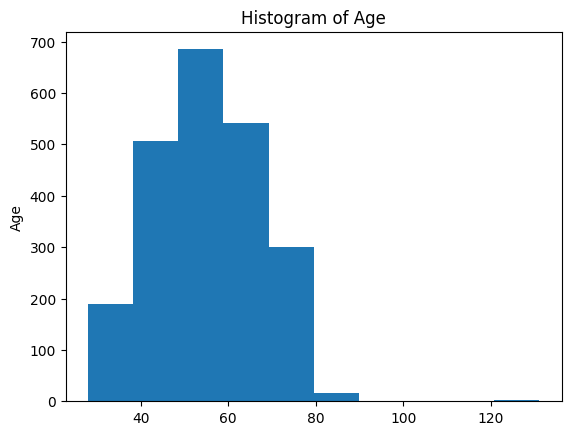

In [19]:
import matplotlib.pyplot as plt
plt.hist(sm_df['Age'])
plt.xlabel('')
plt.ylabel('Age')
plt.title('Histogram of Age')
plt.show()

<font size="+2">As We Can see most of the customers Age are between 50 to 70 and their are few outliers that has age of 120 or above and it also follows normal disribution if we exclude outliers</font>



In [20]:
##Calculating descriptive Stats for Martial Status

import pandas as pd

marital_status_counts = sm_df['Marital_Status'].value_counts()
total_count = len(sm_df)

# Percentage
marital_status_percentage = marital_status_counts / total_count * 100

# Mode
mode_marital_status = marital_status_counts.idxmax()

# Median (if applicable)
median_marital_status = sm_df['Marital_Status'].mode()

##for bold
bold = '\033[1m'
# Printing the results
print(bold +"Frequency of Marital Status:")
print(marital_status_counts)
print("\nPercentage of Marital Status:")
print(marital_status_percentage)
print("\nMode Marital Status:", mode_marital_status)
print("\nMedian Marital Status:", median_marital_status)


Frequency of Marital Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

Percentage of Marital Status:
Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
YOLO         0.089286
Absurd       0.089286
Name: count, dtype: float64

Mode Marital Status: Married

Median Marital Status: 0    Married
Name: Marital_Status, dtype: object


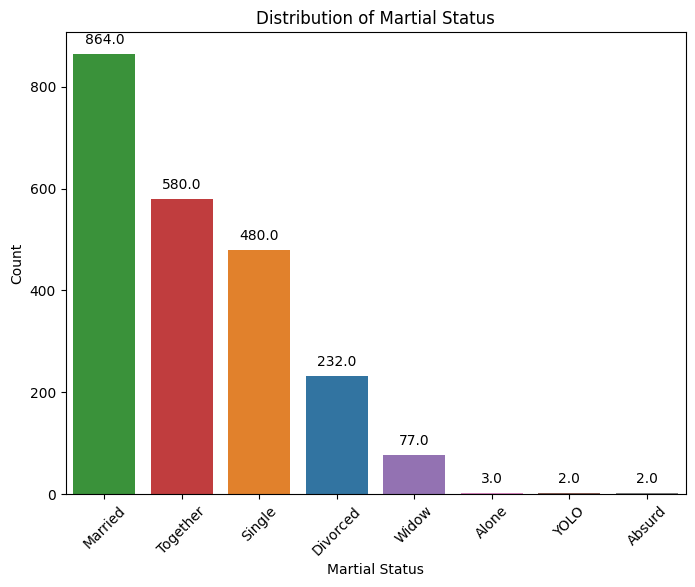

In [21]:
## Now visualizing this

import seaborn as sns
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Marital_Status', data=sm_df, hue='Marital_Status',order=sm_df['Marital_Status'].value_counts().index)
plt.title('Distribution of Martial Status')
plt.xlabel('Martial Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<font size = '+2'>From the above graph and descriptive stats we can see that martial status is categorical so for binomial distribution will be a good chioce and we can also see their are 38% from the total customers are married and 25 % are together that means almost 65% customers from total customers are couples </font>

In [22]:
##Calculating descriptive Stats for Education

Education_status_counts = sm_df['Education'].value_counts()
total_count = len(sm_df)

# Percentage
Education_percentage = Education_status_counts / total_count * 100

# Mode
mode_Education_status = Education_status_counts.idxmax()

# Median (if applicable)
median_Education_status = sm_df['Education'].mode()

##for bold
bold = '\033[1m'
# Printing the results
print(bold +"Frequency of Education:")
print(Education_status_counts)
print("\nPercentage of Education:")
print(Education_percentage)
print("\nMode Education:", mode_Education_status)
print("\nMedian Education:", median_Education_status)


Frequency of Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Percentage of Education:
Education
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: count, dtype: float64

Mode Education: Graduation

Median Education: 0    Graduation
Name: Education, dtype: object


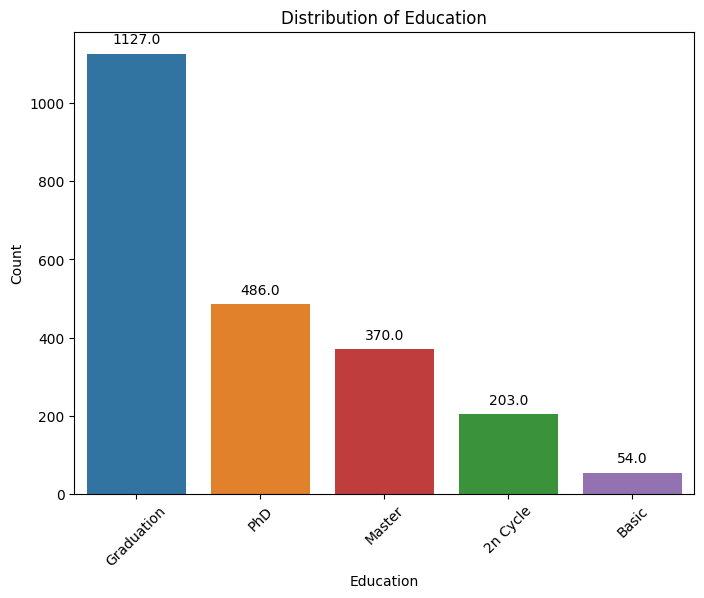

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Education', data=sm_df, hue='Education',order=sm_df['Education'].value_counts().index)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## From the above graph and descriptive stats we can see that its also categorical variable so the binomial distribution will be better chioce for this and We can also see that our most of the customers almost 50% customers are Graduated and then PhD customers are 21% and Masters customers are 16% so we can consider our most of the cutomers 50+21+16 = 87% customers are highly educated and rest all have low level education customers so we have to target them too to increase our sales

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [24]:
import numpy as np
import statistics
import scipy.stats as stats

In [25]:
# Select key numerical variables
numerical_variables = ['Age','Income','MntWines','MntGoldProds','NumWebVisitsMonth', 'NumStorePurchases', 'Kidhome', 'Teenhome']

In [26]:
import pandas as pd
import statistics
import numpy as np
from scipy import stats
# Assuming numerical_variables is a list of numerical variable names

# Lists to store statistics
variables = []
means = []
medians = []
modes = []
variances = []
std_deviations = []
num_outliers = []

for variable in numerical_variables:
    mean = statistics.mean(sm_df[variable])
    median = statistics.median(sm_df[variable])
    mode = statistics.mode(sm_df[variable])
    std_deviation = statistics.stdev(sm_df[variable])
    variance = np.var(sm_df[variable])
    z_scores = np.abs(stats.zscore(sm_df[variable]))
    threshold = 3  # Define the threshold for identifying outliers

    # Identify outliers
    outliers = sm_df[variable][z_scores > threshold]

    # Append statistics to lists
    variables.append(variable)
    means.append(mean)
    medians.append(median)
    modes.append(mode)
    variances.append(variance)
    std_deviations.append(std_deviation)
    num_outliers.append(len(outliers))

# Create a DataFrame
statistics_df = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes,
    'Variance': variances,
    'Standard Deviation': std_deviations,
    'Number of Outliers': num_outliers
},index = variables)
pd.options.display.float_format = '{:.2f}'.format




In [27]:
statistics_df

,Mean,Median,Mode,Variance,Standard Deviation,Number of Outliers
Age,55.19,54.00,48.00,143.55,11.98,3
Income,52371.47,51741.50,63841.00,628036155.37,25066.25,8
MntWines,303.94,173.50,2.00,113247.23,336.60,16
MntGoldProds,44.02,24.00,1.00,2720.23,52.17,44
NumWebVisitsMonth,5.32,6.00,7.00,5.89,2.43,9
NumStorePurchases,5.79,5.00,3.00,10.56,3.25,0
Kidhome,0.44,0.00,0.00,0.29,0.54,0
Teenhome,0.51,0.00,0.00,0.30,0.54,0


# **Handling outliers in Income**

(array([1.678e+03, 5.540e+02, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1730. ,  68223.6, 134717.2, 201210.8, 267704.4, 334198. ,
        400691.6, 467185.2, 533678.8, 600172.4, 666666. ]),
 <BarContainer object of 10 artists>)

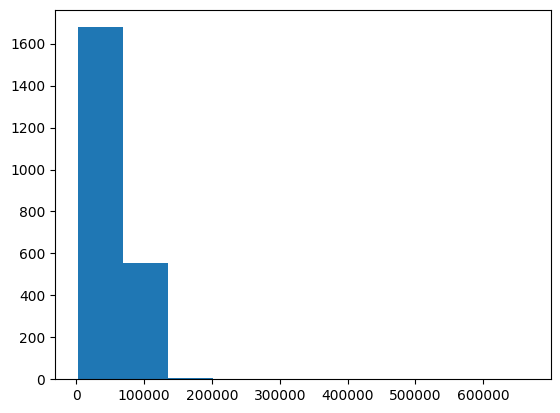

In [28]:
## Income hist befor handling outliers
plt.hist(sm_df['Income'])

In [29]:
income_Q1 = np.quantile(sm_df["Income"], 0.25)
print("First quartile = ", income_Q1)
income_Q3 = np.quantile(sm_df["Income"], 0.75)
print("Third quartile = ", income_Q3)
income_IQR = income_Q3 - income_Q1
print("Inter quartile range = ", income_IQR)

First quartile =  35538.75
Third quartile =  68289.75
Inter quartile range =  32751.0


In [30]:
outlier_indices = np.where((sm_df["Income"] < (income_Q1 - 1.5*income_IQR)) | (sm_df["Income"] > (income_Q3 + 1.5*income_IQR)))
income_outliers = sm_df.iloc[outlier_indices]["Income"]
print("Income outliers = ", income_outliers)

Income outliers =  325    157146.00
497    160803.00
527    666666.00
731    162397.00
853    157733.00
1826   153924.00
1925   156924.00
2204   157243.00
Name: Income, dtype: float64


In [31]:
#dropping outliers from Income
income_without_outliers = sm_df["Income"].drop(outlier_indices[0])
print(income_without_outliers)

0      84835.00
1      57091.00
2      67267.00
3      32474.00
4      21474.00
         ...   
2235   66476.00
2236   31056.00
2237   46310.00
2238   65819.00
2239   94871.00
Name: Income, Length: 2232, dtype: float64


(array([ 37., 185., 333., 399., 351., 391., 331., 174.,  28.,   3.]),
 array([  1730. ,  12930.4,  24130.8,  35331.2,  46531.6,  57732. ,
         68932.4,  80132.8,  91333.2, 102533.6, 113734. ]),
 <BarContainer object of 10 artists>)

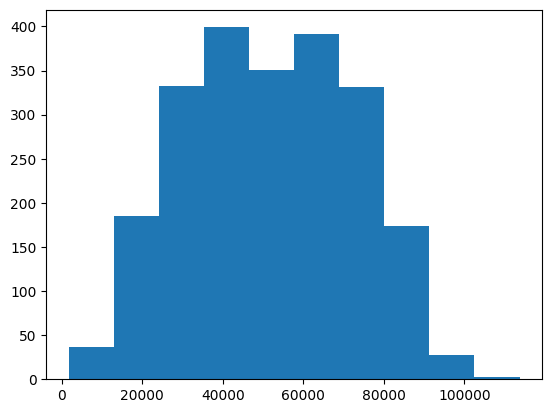

In [32]:
plt.hist(income_without_outliers)

### We can See after handling ouliers We can see more clear visluals for our insights getting better knowledge of our dataset,Now we can salary above 30k and below 70K is our targeted customers or the customers who purchase more from us

# **Handling ouliers in MntGoldProds**

(array([1.397e+03, 3.910e+02, 1.880e+02, 1.060e+02, 7.700e+01, 4.800e+01,
        2.900e+01, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([  0. ,  36.2,  72.4, 108.6, 144.8, 181. , 217.2, 253.4, 289.6,
        325.8, 362. ]),
 <BarContainer object of 10 artists>)

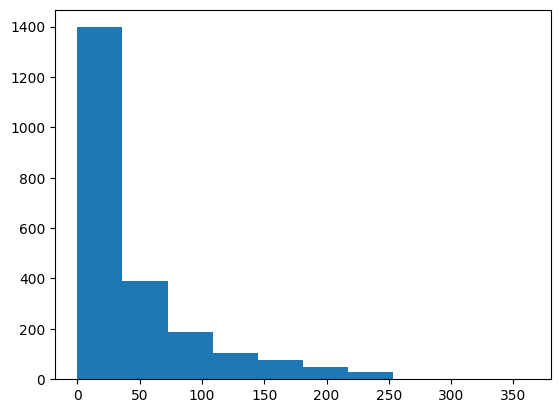

In [33]:
plt.hist(sm_df['MntGoldProds'])

In [34]:
MntGoldProds_Q1 = np.quantile(sm_df["MntGoldProds"], 0.25)
print("First quartile = ", MntGoldProds_Q1)
MntGoldProds_Q3 = np.quantile(sm_df["MntGoldProds"], 0.75)
print("Third quartile = ", MntGoldProds_Q3)
MntGoldProds_IQR = MntGoldProds_Q3 - MntGoldProds_Q1
print("Inter quartile range = ", MntGoldProds_IQR)

First quartile =  9.0
Third quartile =  56.0
Inter quartile range =  47.0


In [35]:
outlier_indices = np.where((sm_df["MntGoldProds"] < (MntGoldProds_Q1 - 1.5*MntGoldProds_IQR)) | (sm_df["MntGoldProds"] > (MntGoldProds_Q3 + 1.5*MntGoldProds_IQR)))
MntGoldProds_outliers = sm_df.iloc[outlier_indices]["MntGoldProds"]
print("MntGoldProds outliers = ", MntGoldProds_outliers)

MntGoldProds outliers =  0       218
14      321
31      197
39      172
60      262
       ... 
2168    191
2175    139
2219    187
2223    183
2239    144
Name: MntGoldProds, Length: 207, dtype: int64


In [36]:
MntGoldProds_without_outliers = sm_df["MntGoldProds"].drop(outlier_indices[0])
print(MntGoldProds_without_outliers)

1       37
2       30
3        0
4       34
5       43
        ..
2234    34
2235    78
2236    16
2237    14
2238    63
Name: MntGoldProds, Length: 2033, dtype: int64


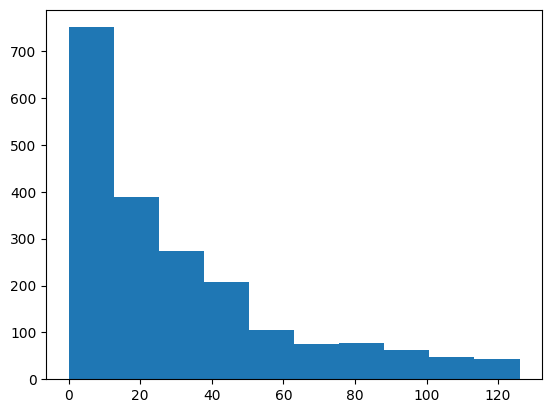

In [37]:
## After dropping ouliers
plt.hist(MntGoldProds_without_outliers)
plt.show()

### After handling ouliers we can see most of the gold products are buying between in range of 0-20 like most of the customers are buying at last 20 gold products and then some buys 40 but from 50 their is very less customers buy 50 or more than 50 gold products

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

# **Martial-Status**

In [38]:
## frist we see the unique category in Martial Status
unique_category = sm_df['Marital_Status'].unique()
print(unique_category)

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


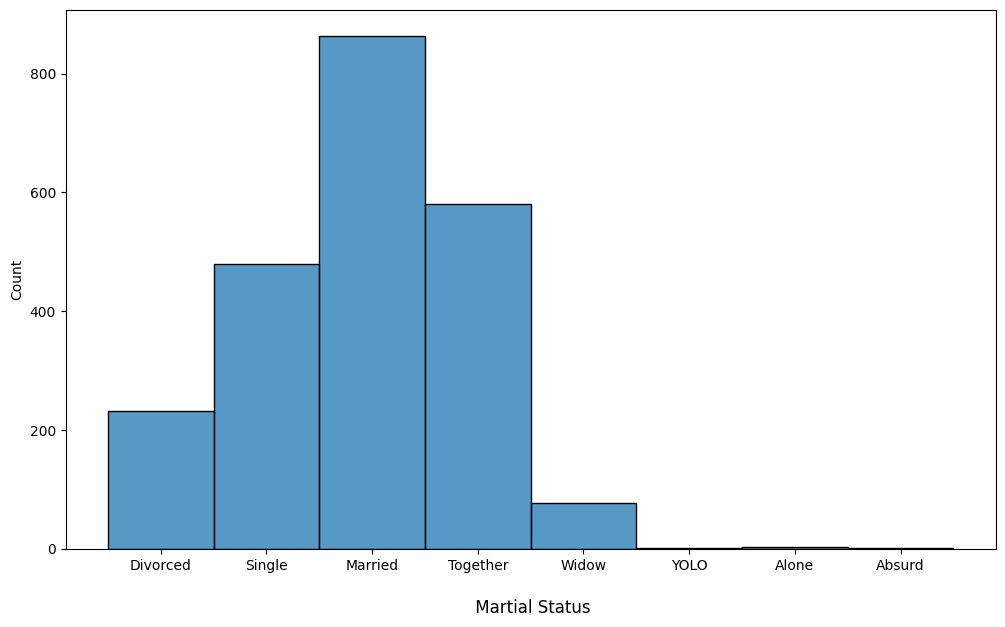

In [39]:
## Now we plot a hist plot for seeing data distribution in Martial status and identifying its best fit distribution
import seaborn as sns
plt.figure(figsize = (12,7))
sns.histplot(sm_df['Marital_Status'])
plt.xlabel("\n Martial Status",fontsize = 12)
plt.show()

**Since we can see that Marital_Status variable is a categorical variable with more than two values we can say that it follows Multinomial distribution. If it had only two possible values we would have to classify it as a Binomial distribution.**

**But we can convert it into a Binomial distribution by defining 2 classes for the variables. Lets say those classes are Couples and Singles.**

In [40]:
##Now we take married and together as couples as one class and others as single as one class

martial_series = sm_df["Marital_Status"].apply(lambda x : "Couples" if x in ["Married","Together"] else "Single")

In [41]:
## Checking our variable and thier value counts

martial_series.value_counts()

,count
Marital_Status,
Couples,1444
Single,796


In [42]:
total_count = martial_series.count()
print("Total count is ",total_count)
couples_count = martial_series.value_counts()[0]
print("Couples count is ",couples_count)
singles_count = martial_series.value_counts()[1]
print("Single count is ",singles_count)

Total count is  2240
Couples count is  1444
Single count is  796


<ipython-input-42-34f7fd2395f1>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  couples_count = martial_series.value_counts()[0]
<ipython-input-42-34f7fd2395f1>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  singles_count = martial_series.value_counts()[1]


In [43]:
#Probability of couples in the variable
P_couples = couples_count / total_count
print("Probability of couples = ", P_couples)
P_single = singles_count / total_count
print("Probability of single = ", P_single)

Probability of couples =  0.6446428571428572
Probability of single =  0.35535714285714287


In [44]:
##prob of taking 32 customers as couples in 50 customers
from math import comb
P_32_couples_out_of_50 = comb(50, 20) * ((0.6446) ** 32) * ((0.3553) ** (50 - 32))
print("Probability = ", P_32_couples_out_of_50)

Probability =  0.30289601044554293


<font size = "+2"> From this We can see thier is high chance almost 32% chance that out of 50 customers thier are 32 couples

<font size = "+2"> So we should offer them some couple offers or start some couples sale to attract more customers or increase thier total buy

In [45]:
## Expected value
n = 50
p_success = P_couples
E = p_success * n
print(E)


32.23214285714286


# **Income**

In [46]:
import numpy as np
income_series_indices = np.where((sm_df["Income"] > sm_df["Income"].quantile(0.01)) & (sm_df["Income"] < sm_df["Income"].quantile(0.99)))
income_series = sm_df.iloc[income_series_indices]["Income"]
income_series


,Income
0,84835.00
1,57091.00
2,67267.00
3,32474.00
4,21474.00
...,...
2234,78901.00
2235,66476.00
2236,31056.00
2237,46310.00


<Axes: xlabel='Income', ylabel='Count'>

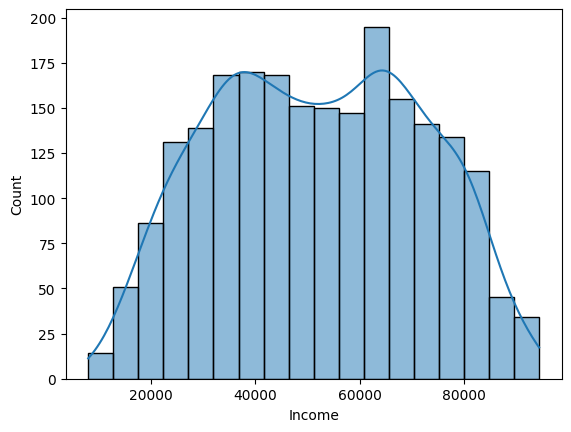

In [47]:
import seaborn as sns
income_df = income_series.reset_index()
sns.histplot(data = income_df, x = "Income", kde = True)

<font size = "+2">From the graph we can see that the Income variable follows Normal distribution. It may have thick tails and there may not be much difference between higher and lower values, so we can say it is Platykurtic, which means it has lower value of kurtosis than normal distribution.

In [48]:
mean_income = np.mean(income_df["Income"])
print("Mean income = ", mean_income)
median_income = np.median(income_df["Income"])
print("Median income = ", median_income)
std_income = np.std(income_df["Income"])
print("Standard deviation of income = ", std_income)

Mean income =  51918.06927985415
Median income =  51741.5
Standard deviation of income =  19894.430310399137


In [49]:
from scipy.stats import norm
#What % of men have income less than median income
z = (median_income - mean_income) / std_income
#Area under the curve until median_income, which should give the first 50 %, which gives the percentage of people under median income
print(norm.cdf(z))

0.49645930919962167


In [50]:
z_60000 = (60000 - mean_income) / std_income
#Area under the curve until 60000 income, i.e. probability of man having income less than 80000
p = norm.cdf(z_60000)
#Thus probability of man having income greater than 60000
p_greater_than_60000 = 1 - p
print("Probability of man having income greater than 60000 = ", p_greater_than_60000)

Probability of man having income greater than 60000 =  0.34228281274742933


In [51]:
#Expected value
#For normal distribution expected value = mean
#Thus,
print("Expected value = ", mean_income)

Expected value =  51918.06927985415


# **Response**

In [52]:
sm_df["Response"].value_counts()

,count
Response,
0,1906
1,334


Since response variable is categorical and has two outcome we can classify it as binomial distribution.

In [53]:
n = sm_df["Response"].count()
print(n)
response_mean = np.mean(sm_df["Response"])
print("Mean = ", response_mean)
response_std = np.std(sm_df["Response"])
print("Standard Deviation = ", response_std)

2240
Mean =  0.14910714285714285
Standard Deviation =  0.3561940521767909


In [54]:
p = 334 / 2240
print("Probability of success = ", p)

Probability of success =  0.14910714285714285


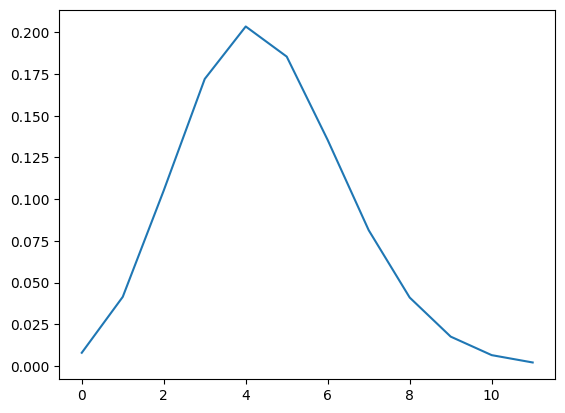

In [55]:
from scipy.stats import binom
r_values = np.arange(12)
#List of pmf values
pmf_binom = binom.pmf(r_values, 30, p)
#plot of pmf
plt.plot(pmf_binom)

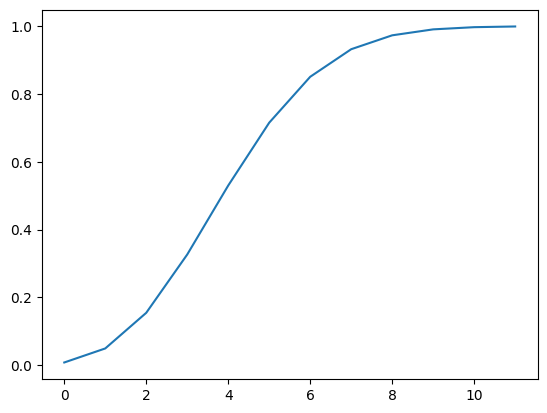

In [56]:
#List of cdf values
cdf_binom = binom.cdf(r_values, 30, p)
#plot of cdf
plt.plot(cdf_binom)

In [57]:
#Expected value = p * n
expected_value = p * 2240
expected_value

334.0

<font size = "+2">Expected value for Response variable is 334, which means if all the responses from 2240 candidates are recorded 334 candidates are expected to have value of 1, i.e. accept the offer.

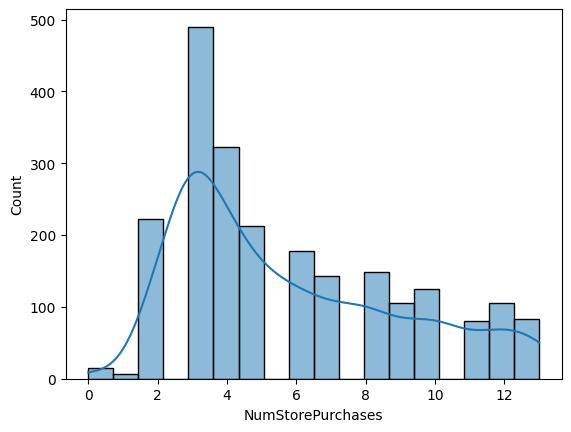

In [59]:
sns.histplot(data = sm_df, x = "NumStorePurchases", kde = True)
plt.show()

<font size = "+2">From the graph we can see that the distribution of NumStorePurchases follows a normal distribution, with a longer tail towards the right, which means it is positively skewed.

In [60]:
store_mean = np.mean(sm_df["NumStorePurchases"])
print("Mean = ", store_mean)
store_median = np.median(sm_df["NumStorePurchases"])
store_std = np.std(sm_df["NumStorePurchases"])
print("Standard Deviation = ", store_std)

Mean =  5.790178571428571
Standard Deviation =  3.250232404367103


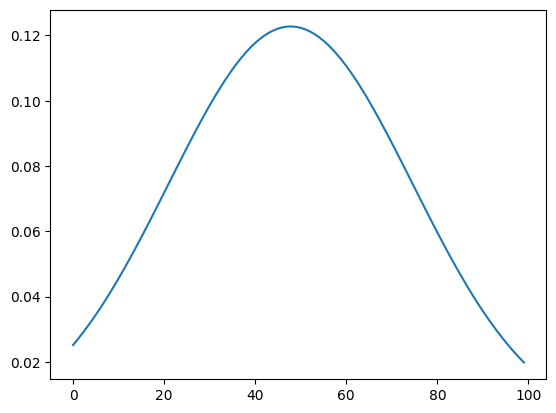

In [61]:
from scipy.stats import norm
n = sm_df["NumStorePurchases"].count()
x = np.linspace(0, 12, 100)
pdf = norm.pdf(x, loc = store_mean, scale = store_std)
#plotting the probability density function
plt.plot(pdf)

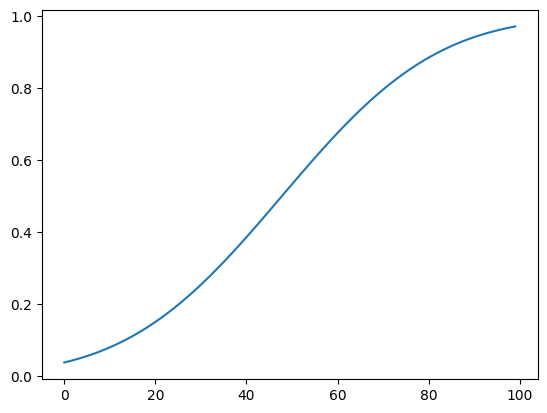

In [62]:
cdf = norm.cdf(x, loc = store_mean, scale = store_std)
#plotting the cumulative density function
plt.plot(cdf)

In [63]:
#Finding percentile
percentile_for_median = norm.ppf(0.5, loc = store_mean, scale = store_std)
print("Value of median, i.e. 50th percentile = ", percentile_for_median)

Value of median, i.e. 50th percentile =  5.790178571428571


In [64]:
#Finding 90th percentile value
percentile_90th = norm.ppf(0.9, loc = store_mean, scale = store_std)
print("90th percentile value = ", percentile_90th)

90th percentile value =  9.955518997629023


In [65]:
#probability of 5 store purchases
z = (5 - store_mean) / store_std
probability_5_purchases = norm.cdf(z)
print("Probability of 5 purchases = ", probability_5_purchases)

Probability of 5 purchases =  0.4039583558713643


<font size = "+2">We can say if a customer visits a store, the probability that he will make 5 purchases is 0.4 or 40%

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

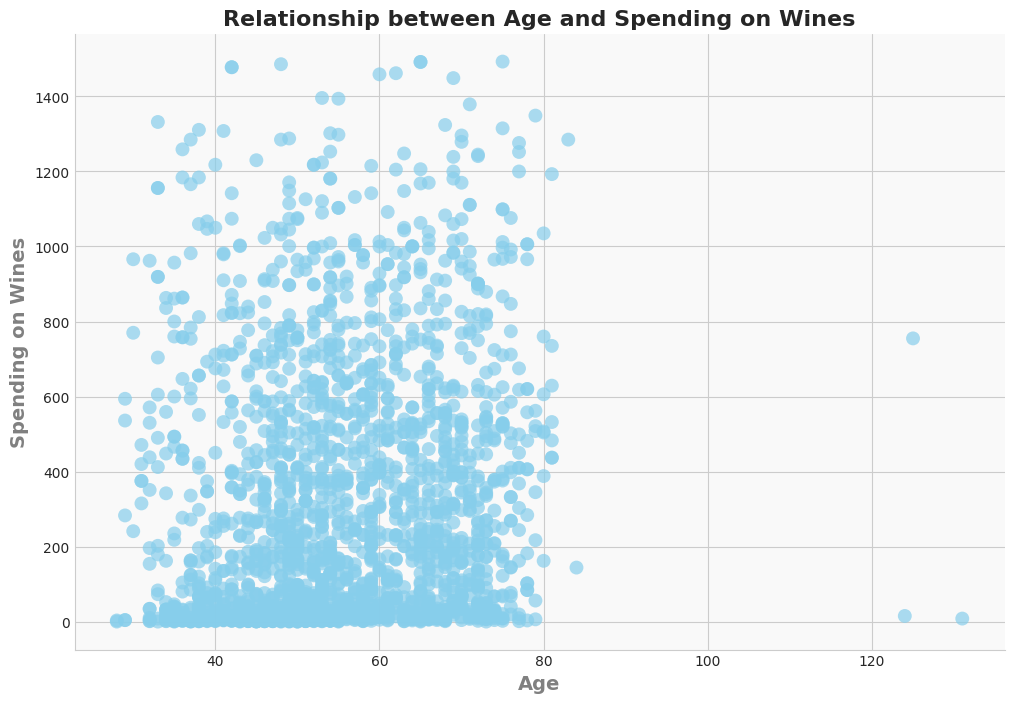

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the scatter plot with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Customize the markers
sns.scatterplot(x='Age', y='MntWines', data=sm_df,
                color='skyblue', alpha=0.7, s=100, edgecolor='none')

# Set labels and title
plt.xlabel('Age', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Spending on Wines', fontsize=14, fontweight='bold', color='gray')
plt.title('Relationship between Age and Spending on Wines', fontsize=16, fontweight='bold')

# Add a background color
plt.gca().set_facecolor('#f9f9f9')

# Remove spines
sns.despine()

# Adjust tick parameters
plt.tick_params(axis='both', which='both', length=0)

# Show plot
plt.show()


- Here, we can see that Spending on Wines till 200 is most from age 30 to 70.

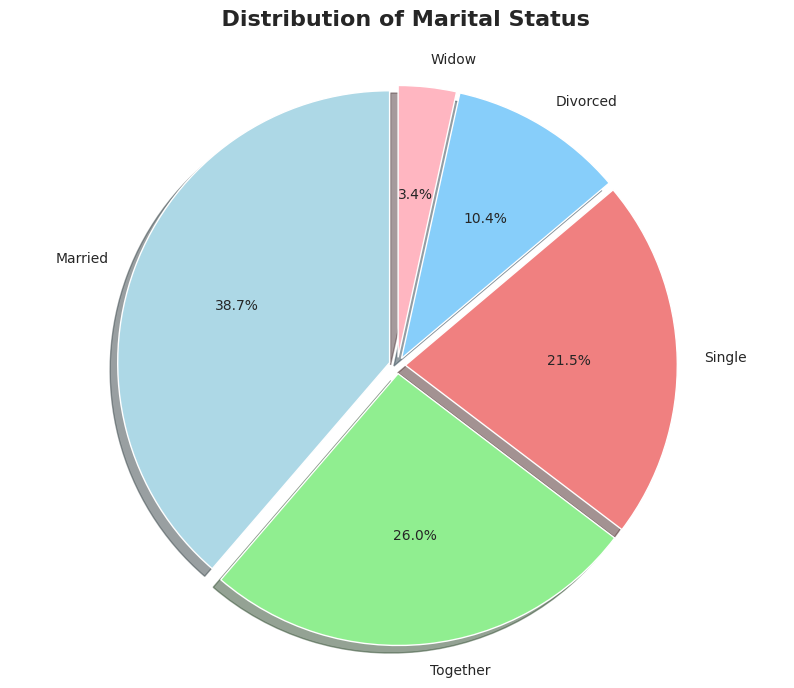

In [67]:
import matplotlib.pyplot as plt

# Data
marital_status_counts = sm_df['Marital_Status'].value_counts().head(5)

# Add colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Explode a segment (optional)
explode = (0.03, 0.03, 0.03, 0.03, 0.03)  # explode the 1st slice

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('  Distribution of Marital Status\n', fontsize=16, fontweight='bold')  # Add title with larger font and bold
plt.show()


**From the above chart we can see most of the custoemrs are Married and together**

In [68]:
sm_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Total_buy', 'Age'],
      dtype='object')

In [69]:

sm_df.groupby("Marital_Status")['Total_buy'].sum().sort_values(ascending = False)

,Total_buy
Marital_Status,
Married,510453
Together,352865
Single,291112
Divorced,141666
Widow,56889
Absurd,2385
YOLO,848
Alone,770


<font size="+2">From the Maritial Status we can see Top 3 top total buying Categories are Married,Together and Single</font>

In [70]:
sm_df.groupby("Marital_Status")['MntGoldProds'].sum().sort_values(ascending = False)

,MntGoldProds
Marital_Status,
Married,36999
Together,24937
Single,20990
Divorced,10739
Widow,4371
Absurd,408
YOLO,84
Alone,81


<font size="+2">From the Maritial Status we can see Top 3 top Gold Products purchasing Categories are Married,Together and Single</font>

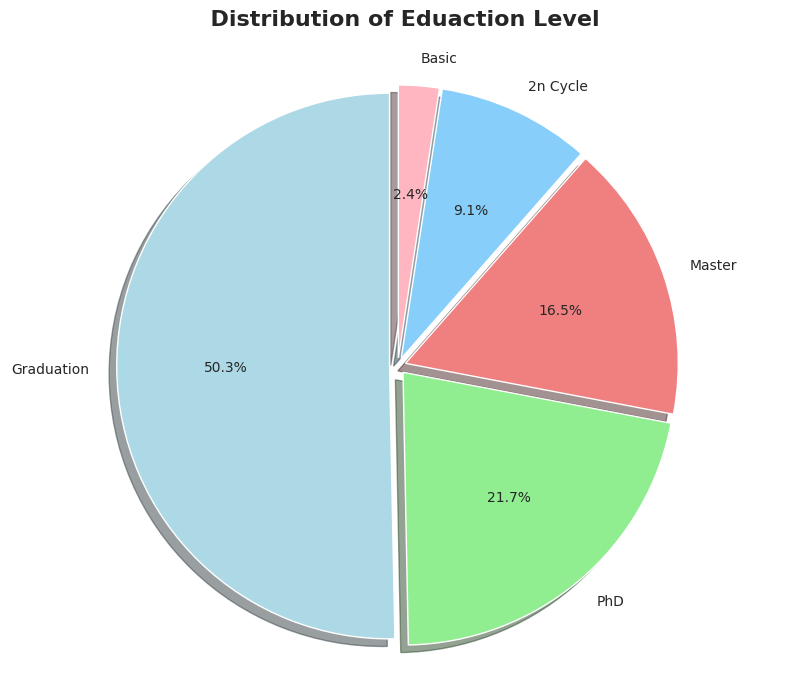

In [71]:
import matplotlib.pyplot as plt

# Data
marital_status_counts = sm_df['Education'].value_counts()

# Add colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Explode a segment (optional)
explode = (0.03, 0.03, 0.03, 0.03, 0.03)  # explode the 1st slice

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('  Distribution of Eduaction Level\n', fontsize=16, fontweight='bold')  # Add title with larger font and bold
plt.show()


<font size="+2">From the above chart we can see that our most of the customers are have higher education Graduation or high

In [72]:
sm_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Total_buy', 'Age'],
      dtype='object')

<font size = "+2">We can see that customers with minimum graduation level of education have more average web purchase than customers with lower level of education.

In [74]:
sm_df.groupby('Education')['NumStorePurchases'].mean().sort_values(ascending = False)

,NumStorePurchases
Education,
PhD,6.06
Master,5.90
Graduation,5.83
2n Cycle,5.51
Basic,2.85


<font size = "+2">We can see that educated customers are more likely to purchase product in stores, with Phd having highest average purchase in store while basic education customers have less number of purchases on an average. Steps can be taken to educate the customers with lower level of study about the product or make the product more user friendly for all types of customers.

In [75]:
sm_df.groupby('Education')['MntWines'].sum().sort_values(ascending = False)

,MntWines
Education,
Graduation,320371
PhD,196585
Master,123238
2n Cycle,40231
Basic,391


<font size = "+2"> we can see that wines are most likely too purchased by minimum graduation level customers

In [76]:
sm_df.groupby("Teenhome")["MntSweetProducts"].mean()

,MntSweetProducts
Teenhome,
0,33.63
1,20.23
2,16.08


In [77]:
sm_df.groupby("Kidhome")["MntSweetProducts"].mean()

,MntSweetProducts
Kidhome,
0,40.50
1,8.93
2,4.71


In [78]:
sm_df.groupby("Kidhome")["MntWines"].mean()

,MntWines
Kidhome,
0,451.17
1,104.40
2,74.79


<font size = "+2">From the above 3 segmentations we can see that customers who have less kids or teens in their home are more likely to buy sweet products, which means they tend to reduce sweet products consumption in presence of kids.

<font size = "+2">Also from the last segmentation we can see that customers who dont have kids are more likely to buy wine product. Thus, customers who don't have kids can be targeted for wine product.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

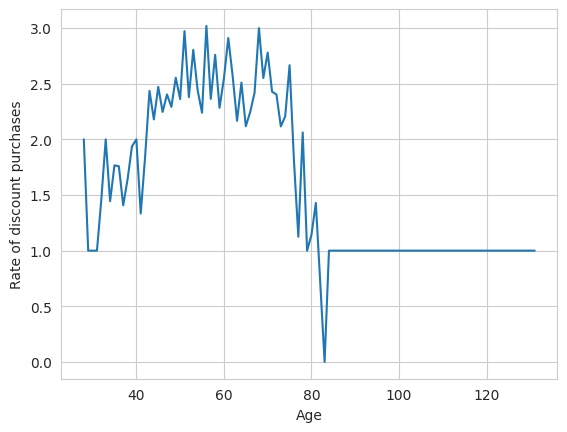

In [79]:
plt.plot(sm_df.groupby("Age")["NumDealsPurchases"].mean())
plt.xlabel("Age")
plt.ylabel("Rate of discount purchases")
plt.show()

<font size = "+2">We can see that customers with age between 50 to 70 are more prone to purchase if they are given a discount. Thus higher age customers can be given age based discounts to attract them more.

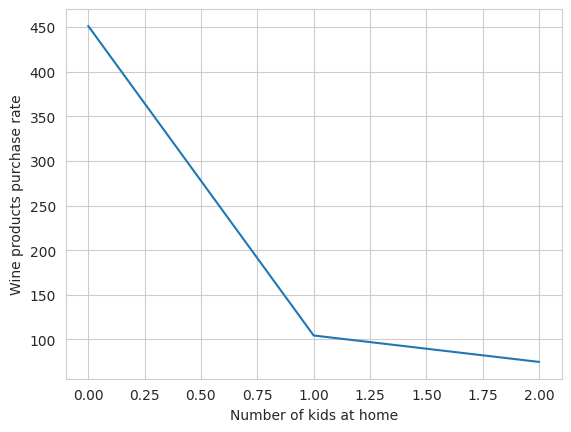

In [80]:
plt.plot(sm_df.groupby("Kidhome")["MntWines"].mean())
plt.xlabel("Number of kids at home")
plt.ylabel("Wine products purchase rate")
plt.show()

<font size = "+2">We can see that customer who dont have kids are more likely to buy wine product. Thus, customers who don't have kids can be targeted for wine product.

In [81]:
visits_by_education = sm_df.groupby("Education")["NumWebVisitsMonth"].sum().reset_index()
visits_by_education

,Education,NumWebVisitsMonth
0,2n Cycle,1107
1,Basic,371
2,Graduation,5959
3,Master,1916
4,PhD,2556


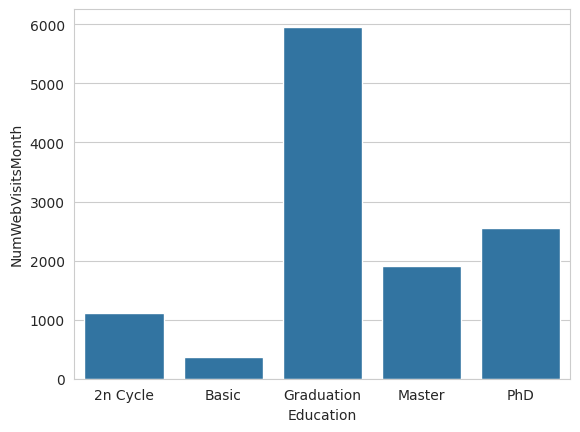

In [82]:
sns.barplot(data = visits_by_education, x = "Education", y = "NumWebVisitsMonth")
plt.show()

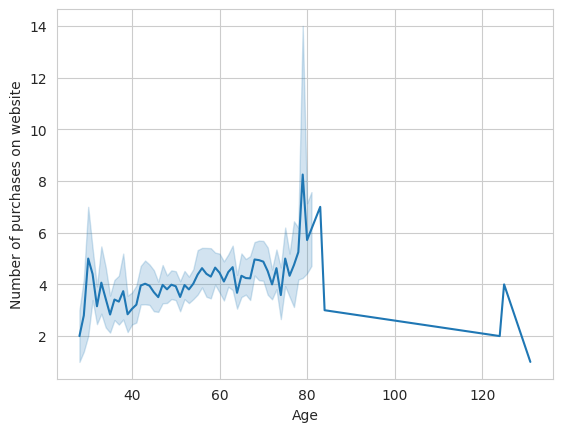

In [83]:
sns.lineplot(data = sm_df, x = "Age", y = "NumWebPurchases")
plt.xlabel("Age")
plt.ylabel("Number of purchases on website")
plt.show()

<font size = "+2">We can see that as customer age increases they are more likely to purchase through website than visit the store in person. We can ignore the graph after age of 100 as it shows irregularity in data.

In [84]:
education_by_mail_purchase = sm_df.groupby("Education")["NumCatalogPurchases"].mean().reset_index()
education_by_mail_purchase

,Education,NumCatalogPurchases
0,2n Cycle,2.32
1,Basic,0.48
2,Graduation,2.73
3,Master,2.57
4,PhD,2.97


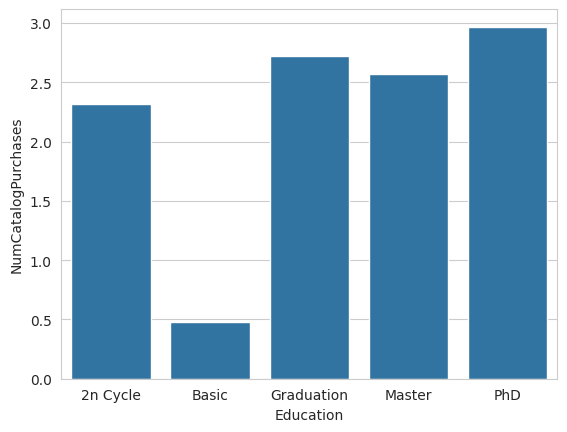

In [85]:
sns.barplot(data = education_by_mail_purchase, x = "Education", y = "NumCatalogPurchases")
plt.show()

<font size = "+2">We can see that customer who have higher education (i.e. 2nd cycle, graduation, master, phd) are more likely to do mail/catalog purchase than customers who have basic education.

##Summarization of all findings from customer segmentation :    
1. The website is mostly visited by people who have minimum education level of graduation, which is logical as more educated customers are most likely to visit website.
2. Customers with minimum graduation level of education have more average web purchase than customers with lower level of education.
3. Educated customers are more likely to purchase product from stores, with Phd having highest average purchase in store while basic education customers have less number of purchases on an average.
4. Customers who have less kids or teens in their home are more likely to buy sweet products.
5. Customers who dont have kids are more likely to buy wine product.
6. Customers with higher age are more prone to purchase if they are given a discount.
7. As customer age increases they are more likely to purchase through website than visit the store in person.
8. Customers who have higher education (i.e. 2nd cycle, graduation, master, phd) are more likely to do mail/catalog purchase than customers who have basic education.
9. Our most of the Customers are married or together means couples that means we can give them some discount or offers so they shop more and also sugest them couples products and enhance their experince so they suggest other peoples too to shop from us

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍